## Clustering Data

Let's now cluster the cleaned data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
FeedBacks = pd.read_csv('eBay_Feedbacks.csv')
FeedBacks

,Unnamed: 0,Feedbacks
0,0,aaa+++
1,1,okay thanks a1 super fast
2,3,great service
3,4,"described, shipped fast . thanks"
4,5,add collectiobn..thanks
...,...,...
537,622,nice metal shapes came well packed. thanks
538,623,"fast shipper, would purchase"
539,624,h/recomend
540,625,excellent


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [4]:
# TfidVectorizer

In [5]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(FeedBacks['Feedbacks'])

k_rng = range(1,15)
sse = []

for k in k_rng:
    km1 = KMeans(n_clusters=k)
    km1.fit(X)
    sse.append(km1.inertia_)

In [6]:
# CountVectorizer

In [7]:
cv = CountVectorizer()
X2 = cv.fit_transform(FeedBacks['Feedbacks'])

k_rng2 = range(1,15)
sse2 = []

for k in k_rng2:
    km2 = KMeans(n_clusters=k)
    km2.fit(X2)
    sse2.append(km2.inertia_)

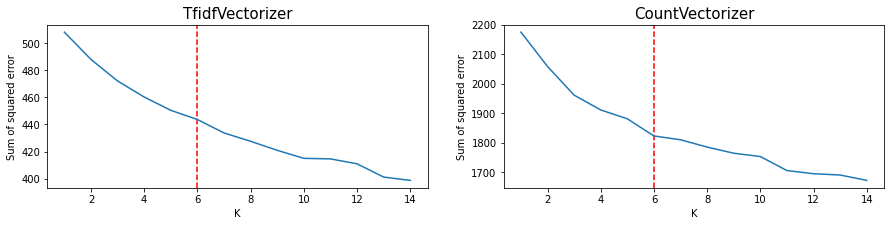

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,3))

ax1.set_xlabel('K')
ax1.set_ylabel('Sum of squared error')
ax1.axvline(x = 6, ymin = 0, ymax = 1, color ='red', linestyle ="--")
ax1.set_title("TfidfVectorizer", fontsize='15')
ax1.plot(k_rng, sse)

ax2.set_xlabel('K')
ax2.set_ylabel('Sum of squared error')
ax2.axvline(x = 6, ymin = 0, ymax = 1, color ='red', linestyle ="--")
ax2.set_title("CountVectorizer", fontsize='15')
ax2.plot(k_rng2, sse2)

we found 8 clusters, let's reduce the dimension and find what are the most important features impacting the target variable the most.

In [9]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

X_pca = pca.fit_transform(X.toarray())
X2_pca = pca.fit_transform(X2.toarray())

In [10]:
# Visualize TfidVectorizer

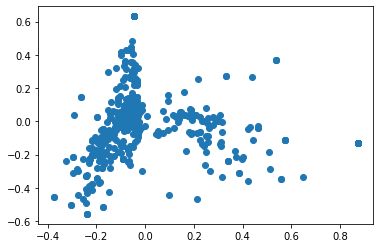

In [11]:
plt.scatter(X_pca[:,0], X_pca[:,1])

In [12]:
# Visualize CountVectorizer

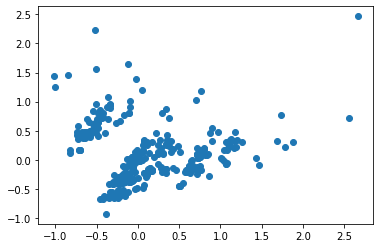

In [13]:
plt.scatter(X2_pca[:,0], X2_pca[:,1])

In [14]:
# TfidVectorizer
FeedBacks['x'] = X_pca[:,0]
FeedBacks['y'] = X_pca[:,1]

In [15]:
# CountVectorizer
FeedBacks['x2'] = X2_pca[:,0]
FeedBacks['y2'] = X2_pca[:,1]

In [34]:
km_tfid = KMeans(n_clusters=6)

y_predicted_tfid = km_tfid.fit_predict(FeedBacks[['x','y']])
# y_predicted_tfid.shape

FeedBacks['cluster_tfid'] = y_predicted_tfid

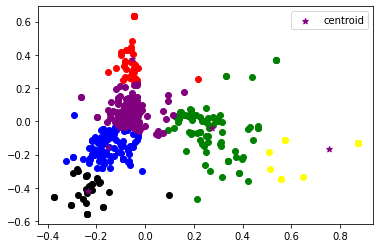

In [36]:
df1 = FeedBacks[FeedBacks['cluster_tfid']==0]
df2 = FeedBacks[FeedBacks['cluster_tfid']==1]
df3 = FeedBacks[FeedBacks['cluster_tfid']==2]
df4 = FeedBacks[FeedBacks['cluster_tfid']==3]
df5 = FeedBacks[FeedBacks['cluster_tfid']==4]
df6 = FeedBacks[FeedBacks['cluster_tfid']==5]

plt.scatter(df1.x,df1.y,color='green')
plt.scatter(df2.x,df2.y,color='red')
plt.scatter(df3.x,df3.y,color='black')
plt.scatter(df4.x,df4.y,color='yellow')
plt.scatter(df5.x,df5.y,color='blue')
plt.scatter(df6.x,df6.y,color='purple')

plt.scatter(km_tfid.cluster_centers_[:,0],km_tfid.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [18]:
km_cv = KMeans(n_clusters=6)

y_predicted_cv = km_cv.fit_predict(FeedBacks[['x','y']])
# y_predicted_cv.shape

FeedBacks['cluster_cv'] = y_predicted_cv

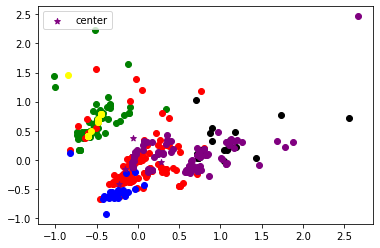

In [19]:
df_1 = FeedBacks[FeedBacks['cluster_cv']==0]
df_2 = FeedBacks[FeedBacks['cluster_cv']==1]
df_3 = FeedBacks[FeedBacks['cluster_cv']==2]
df_4 = FeedBacks[FeedBacks['cluster_cv']==3]
df_5 = FeedBacks[FeedBacks['cluster_cv']==4]
df_6 = FeedBacks[FeedBacks['cluster_cv']==5]

plt.scatter(df_1.x2, df_1.y2, color='green')
plt.scatter(df_2.x2, df_2.y2, color='red')
plt.scatter(df_3.x2, df_3.y2, color='black')
plt.scatter(df_4.x2, df_4.y2, color='yellow')
plt.scatter(df_5.x2, df_5.y2, color='blue')
plt.scatter(df_6.x2, df_6.y2, color='purple')

plt.scatter(km_cv.cluster_centers_[:,0],km_cv.cluster_centers_[:,1],color='purple',marker='*',label='center')
plt.legend()

In [20]:
FeedBacks.head()

,Unnamed: 0,Feedbacks,x,y,x2,y2,cluster_tfid,cluster_cv
0,0,aaa+++,-0.044942,0.093395,-0.192714,-0.335653,0,1
1,1,okay thanks a1 super fast,-0.084125,0.205818,-0.014459,-0.483491,0,1
2,3,great service,-0.217109,-0.379079,0.638214,-0.117726,2,2
3,4,"described, shipped fast . thanks",-0.092856,0.250169,-0.037510,-0.502561,4,4
4,5,add collectiobn..thanks,-0.039646,0.259950,-0.293492,-0.599407,4,4


In [21]:
(km_cv.cluster_centers_, km_tfid.cluster_centers_)

(array([[ 0.2750959 , -0.04190284],
        [-0.05471938,  0.07644485],
        [-0.23252702, -0.42134991],
        [ 0.75260825, -0.16561045],
        [-0.05361448,  0.37352877],
        [-0.15166642, -0.15383688]]),
 array([[-0.06092776,  0.06393483],
        [ 0.2750959 , -0.04190284],
        [-0.18055276, -0.25177561],
        [ 0.75260825, -0.16561045],
        [-0.05301338,  0.36698956]]))

In [22]:
# Plot in 3d

In [23]:
# CountVectorizer

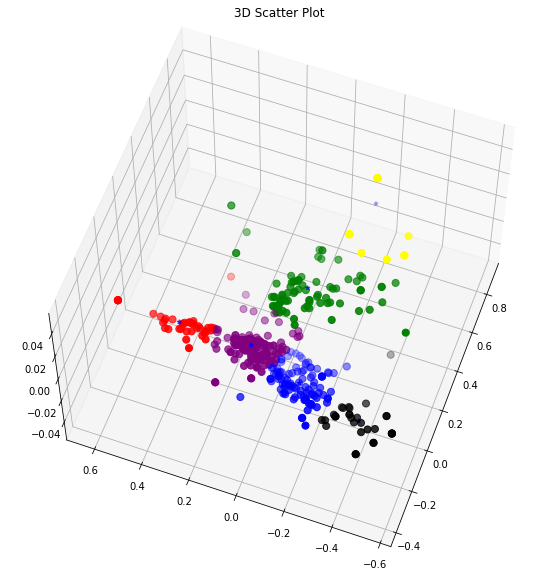

In [37]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()


ax.scatter(df1.x,df1.y,color='green', s = 50)
ax.scatter(df2.x,df2.y,color='red', s = 50)
ax.scatter(df3.x,df3.y,color='black', s = 50)
ax.scatter(df4.x,df4.y,color='yellow', s = 50)
ax.scatter(df5.x,df5.y,color='blue', s = 50)
ax.scatter(df6.x,df6.y,color='purple', s= 50)

ax.scatter(km_cv.cluster_centers_[:,0],km_cv.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
ax.set_title('3D Scatter Plot')
ax.view_init(60, 200)

plt.show()

In [25]:
# TfidVectorizer

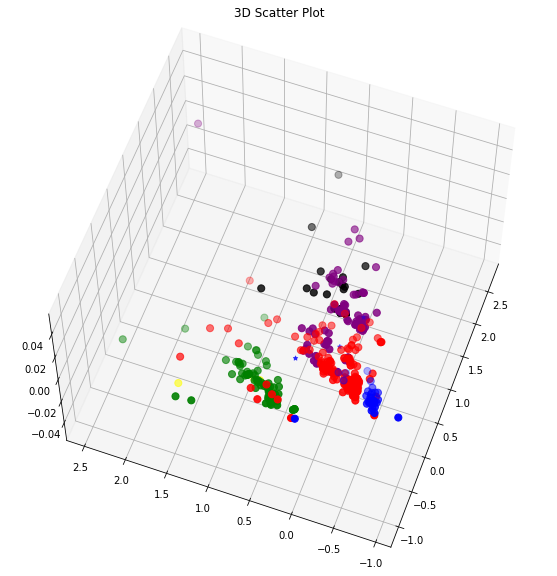

In [26]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(df_1.x2, df_1.y2, color='green', s = 50)
ax.scatter(df_2.x2, df_2.y2, color='red', s = 50)
ax.scatter(df_3.x2, df_3.y2, color='black', s = 50)
ax.scatter(df_4.x2, df_4.y2, color='yellow', s = 50)
ax.scatter(df_5.x2, df_5.y2, color='blue', s = 50)
ax.scatter(df_6.x2, df_6.y2, color='purple',s = 50)

ax.scatter(km_tfid.cluster_centers_[:,0],km_tfid.cluster_centers_[:,1],color='blue',marker='*',label='centroid')
ax.set_title('3D Scatter Plot')
ax.view_init(60, 200)

plt.show()

## Remarks

We can notice here that by using CountVectorizer, we are finding a better structure to our data that present 5 different cluster. Let's analyze them:

In [27]:
Feedbacks1 = df_1[['Feedbacks']]
Feedbacks2 = df_2[['Feedbacks']]
Feedbacks3 = df_3[['Feedbacks']]
Feedbacks4 = df_4[['Feedbacks']]
Feedbacks5 = df_5[['Feedbacks']]

In [28]:
Feedbacks1

,Feedbacks
19,good seller. fast postage. a+++
30,good thanks
32,good seller. thanks !!
38,good quality arrived time.
46,good quality. came expected picture.
...,...
508,"good product, fast shipping."
509,good product service
514,good product thankshappy thanks
523,good arrived safe well packed


In [29]:
Feedbacks2

,Feedbacks
0,aaa+++
1,okay thanks a1 super fast
5,many thanks quick delivery.boing boing baggy b...
7,reasonable replacement manufacturer original. ...
10,arrived early. thankyou.
...,...
534,arrived quickly described
538,"fast shipper, would purchase"
539,h/recomend
540,excellent


In [30]:
Feedbacks3

,Feedbacks
2,great service
8,great product service
47,great service. great seller. thank you.
53,looks great great price!
63,great
69,great seller
99,great service product
144,"great product, fast postage."
168,"fast postage, great item, thank a+++"
196,great seller. fast delivery.


In [31]:
Feedbacks4

,Feedbacks
18,good
42,good product.
71,good
73,good 👍
90,good seller
97,good
165,good service good product
185,good
197,good
208,good


In [32]:
Feedbacks5

,Feedbacks
3,"described, shipped fast . thanks"
4,add collectiobn..thanks
6,item arrived. many thanks
25,thanks
78,thanks fast delivery
110,item arrived thanks works perfectly programmed...
120,thanks
138,thanks lot 🤗🤗🤗🤗
155,"item received, thanks!"
156,thanks!
